

# Project: Investigate a The Movies Database (TMDB)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**TMDB** 5000 Movie Dataset This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
This dataset hasn't yet gone through a data quality analysis. Can you find any obvious corrections? For example, in the IMDb version it was necessary to treat values of zero in the budget field as missing. Similar findings would be very helpful to your fellow Kagglers! (It's probably a good idea to keep treating zeros as missing, with the caveat that missing budgets much more likely to have been from small budget films in the first place).ere.
 
example questions for data


1- Which genres are most popular fromyear to year? 

2- What kinds of properties are associated with movies that have high revenues?

3- Number of movie released yekar by year

4- Popularity Over Years

5- Budget and Movie Trends over the years.



In [1]:
# set up import statements for all of the packages

import pandas as pd 
import numpy as np
import matplotlib as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

load data set and view some rows 

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movie_df = pd.read_csv("tmdb-movies.csv")
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#describe some db properities 
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
movie_df.shape

(10866, 21)

In [5]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

view null values for every feature 

In [6]:
movie_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# print number of rows containing null values 
movie_df.shape[0] - movie_df.dropna().shape[0]

8874

In [8]:
# total count of NaN values in all  datbase
movie_df.isnull().sum().sum()

13434

In [9]:
#check number of duplicated rows.
movie_df.duplicated().sum()

1

[124 120 119 136 137 156 125 141  91  94 148 108 105 167 109 115 112 130
 123 114 131 128 132 103 117 101  93 111 147 106 122 116  97  92 118 121
 100 133  96 102  95  88  99  89 107   0   8 104  98 113  85  90  84  82
  87  31  83  48  67  86  74 134   7 110  72  80 127  76   5  56 135  44
  75  81   4 129  78 138 300  62  43  77 153  70  73  14  57  71  79 168
  25  60 246  54  52  16  65  58  18  64  30 240  17 169 144 145 139 165
 142 164  22   6 150 146 233  41 210  23   3   9 152 282 163 285  66 175
 155 177 143 162 158 140 161 170  38 149  36  27  61  11  26 176  69  59
 500 166 185  20  21 338 182 421  15 540 184  12 178  47  63  45 160 189
 157 159 126 188 181 180  33 257 183 705 174 400 191 213 179 470  32 173
  42  10 501  55  68  13 154 202 201  40 192 247 208  50  49 336 900 250
 877 226 254 235 224 366 171 273 172  24 220 389 252   2 360  19 214 352
 248 194 186 187 199 566 561 223 151 270 550  34 294 219  28 229  29 193
 197 225  53 195 242 417 292 372 236 230 200  51 21

<AxesSubplot:ylabel='Frequency'>

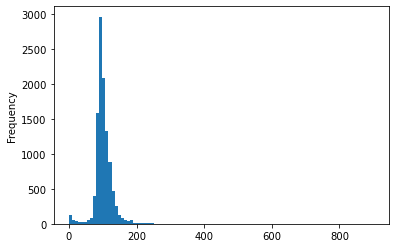

In [10]:
#investigate moviedb values distribution for runtime colomn
print(movie_df["runtime"].unique())
movie_df["runtime"].plot(kind="hist",bins=100)

the values very skewed to the left with zero values and some small numbers less than 10 min and some with big numbers that reaches 900


<AxesSubplot:ylabel='Frequency'>

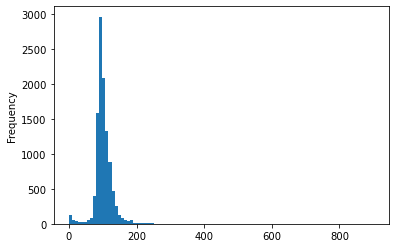

In [11]:
#investigate moviedb values distribution 
movie_df["runtime"].plot(kind="hist",bins=100)

too many values with zeros

<AxesSubplot:ylabel='Frequency'>

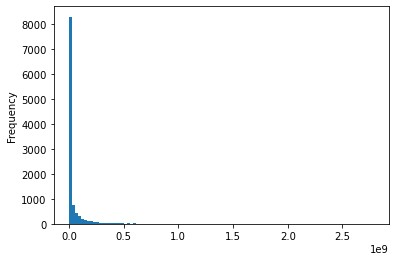

In [12]:
#investigate moviedb values distribution 
movie_df["revenue"].plot(kind="hist",bins=100)

too many values with zeros not normaly distributed and skewed to left

<AxesSubplot:ylabel='Frequency'>

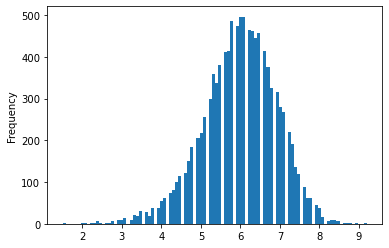

In [13]:
#vote_average 
#investigate moviedb values distribution 
movie_df["vote_average"].plot(kind="hist",bins=100)

alittle bit skewed to right

<AxesSubplot:ylabel='Frequency'>

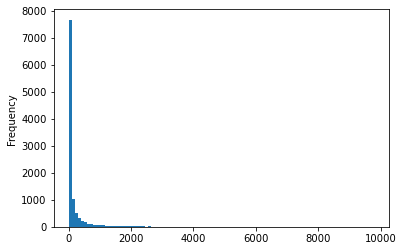

In [14]:
# vote_count
#investigate moviedb values distribution 
movie_df["vote_count"].plot(kind="hist",bins=100)

this colomn contain too many zeros so we can remove it 

In [15]:
movie_df[movie_df == 0].count()

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64


> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

#### Too Many Null Values 

- there are some colomns which have many null values (homepage: 7930 ,tagline :2824,) so we cant drop null rows as this will romove many rows from data set 
- we can remove homepage, 

#### Too many zeros in numerical colomns are missing values

#### Variable Types 

- release_date          --> should be dateTime 
- release_year          --> should be dateTime

#### clolmns with many values separated with | 

- dublicted rows

#### unnessary colomns 
- Drop unnecessary columns homepage, tagline, imdb_id, overview,budget_adj, revenue_adj, keywords.


In [16]:
# drop columns that are not necessary

col = ['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj', 'keywords']
# [ 'production_companies']
movie_df.drop(col, axis=1, inplace=True)
movie_df.head(1)


,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [17]:
# remove dublicates 
movie_df.drop_duplicates(inplace = True)
movie_df.duplicated().sum()

0

In [18]:
# convert release date to date time
movie_df["release_date"]=pd.to_datetime(movie_df["release_date"])
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                10865 non-null  int64         
 3   revenue               10865 non-null  int64         
 4   original_title        10865 non-null  object        
 5   cast                  10789 non-null  object        
 6   director              10821 non-null  object        
 7   runtime               10865 non-null  int64         
 8   genres                10842 non-null  object        
 9   production_companies  9835 non-null   object        
 10  release_date          10865 non-null  datetime64[ns]
 11  vote_count            10865 non-null  int64         
 12  vote_average          10865 non-null  float64       
 13  release_year    

In [19]:
# drop null values
movie_df.dropna(inplace=True)
movie_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9772 non-null   int64         
 1   popularity            9772 non-null   float64       
 2   budget                9772 non-null   int64         
 3   revenue               9772 non-null   int64         
 4   original_title        9772 non-null   object        
 5   cast                  9772 non-null   object        
 6   director              9772 non-null   object        
 7   runtime               9772 non-null   int64         
 8   genres                9772 non-null   object        
 9   production_companies  9772 non-null   object        
 10  release_date          9772 non-null   datetime64[ns]
 11  vote_count            9772 non-null   int64         
 12  vote_average          9772 non-null   float64       
 13  release_year     

In [20]:
# use means to fill 0 values in colomns (budget,revenue) with mean
movie_df[['budget', 'revenue','runtime']] = movie_df[['budget', 'revenue','runtime']].replace(0, np.NAN) 
movie_df.fillna(movie_df.mean(), inplace=True)
# movie_df.dropna(inplace=True)
movie_df.info()

<ipython-input-20-ef4bf35dbcbc>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  movie_df.fillna(movie_df.mean(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9772 non-null   int64         
 1   popularity            9772 non-null   float64       
 2   budget                9772 non-null   float64       
 3   revenue               9772 non-null   float64       
 4   original_title        9772 non-null   object        
 5   cast                  9772 non-null   object        
 6   director              9772 non-null   object        
 7   runtime               9772 non-null   float64       
 8   genres                9772 non-null   object        
 9   production_companies  9772 non-null   object        
 10  release_date          9772 non-null   datetime64[ns]
 11  vote_count            9772 non-null   int64         
 12  vote_average          9772 non-null   float64       
 13  release_year     

In [21]:
# after finish save cleaned data to csv file
movie_df.to_csv('tmdb-movies_v2.csv')

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 Number of movie released with every year

In [32]:

movies = movie_df.groupby('release_year').count().reset_index()
movies = movies[["release_year","id"]].rename(columns={"id": "count"})
movies.head()
# movies.columns

,release_year,count
0,1960,32
1,1961,30
2,1962,30
3,1963,34
4,1964,41


Text(0, 0.5, 'nof movies')

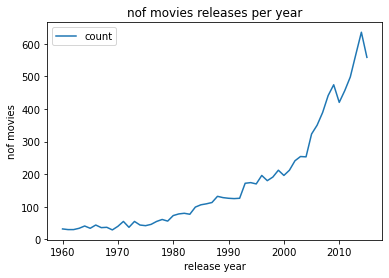

In [33]:
ax=movies.plot(x='release_year', y='count',kind='line',title="nof movies releases per year")

ax.set_xlabel('release year')
ax.set_ylabel('nof movies')

the number of movies releases  every year increasing, and most year with movies 2015   

### Research Question 2 Which genres are most popular fromyear to year?
What kinds of properties are associated with movies that have high revenues?

In [37]:
movies = movie_df.groupby('release_year')["genres"].apply(lambda x: '|'.join(x)).reset_index()

movies.head()

,release_year,genres
0,1960,Drama|Horror|Thriller|Action|Adventure|Western...
1,1961,Adventure|Animation|Comedy|Family|Comedy|Drama...
2,1962,Adventure|Action|Thriller|Adventure|Drama|Hist...
3,1963,Action|Thriller|Adventure|Animation|Family|Hor...
4,1964,Adventure|Action|Thriller|Drama|Comedy|War|Com...


In [38]:
import statistics 

def most_freq(list_val):
    return statistics.mode(list_val)
    

In [39]:
movies["most_pop"] = movies["genres"].apply(lambda x:  most_freq(x.split('|')) )
movies.head()

,release_year,genres,most_pop
0,1960,Drama|Horror|Thriller|Action|Adventure|Western...,Drama
1,1961,Adventure|Animation|Comedy|Family|Comedy|Drama...,Drama
2,1962,Adventure|Action|Thriller|Adventure|Drama|Hist...,Drama
3,1963,Action|Thriller|Adventure|Animation|Family|Hor...,Comedy
4,1964,Adventure|Action|Thriller|Drama|Comedy|War|Com...,Drama


In [40]:
movies.tail()

,release_year,genres,most_pop
51,2011,Action|Adventure|Science Fiction|Drama|Action|...,Drama
52,2012,Science Fiction|Action|Adventure|Fantasy|Actio...,Drama
53,2013,Animation|Adventure|Family|Science Fiction|Thr...,Drama
54,2014,Adventure|Drama|Science Fiction|Action|Science...,Drama
55,2015,Action|Adventure|Science Fiction|Thriller|Acti...,Drama


table shows the most popular genre for every year 

### Research Question 3  relation between Revenue and popularity

<AxesSubplot:title={'center':'revenue with popularity relation'}, xlabel='revenue', ylabel='popularity'>

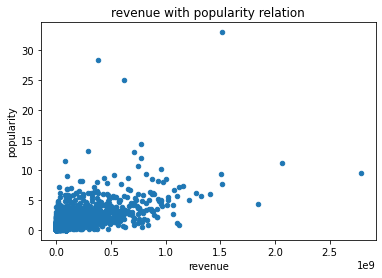

In [43]:
movie_df.plot(x='revenue', y='popularity',kind='scatter', title='revenue with popularity relation')


### Research Question 4 :What is the average runtime of the movies?

In [28]:
avg_runtime = movie_df['runtime'].mean()
avg_runtime 

103.06373603852853

the avg runtime movie around 103 minute

### Research Question 5 :Which genre has the highest number of movies ?

In [29]:
#separate data for colomn 
split_data = pd.Series(movie_df["genres"].str.cat(sep = '|').split('|'))
    
count_data = split_data.value_counts(ascending=False)

<AxesSubplot:ylabel='None'>

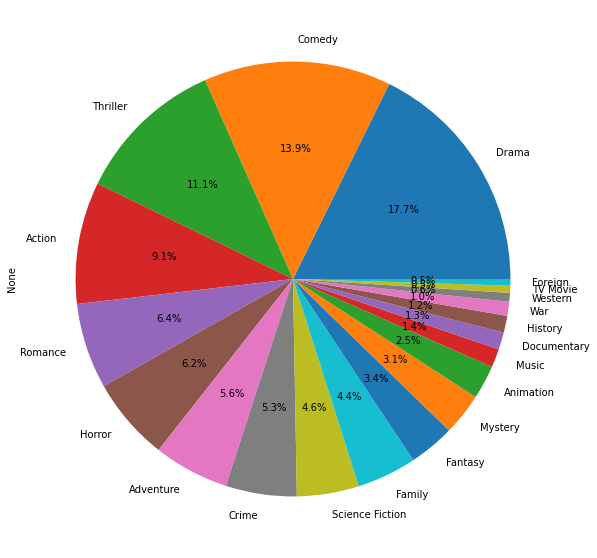

In [30]:
count_data.plot(kind="pie",figsize =(10,10),autopct="%1.1f%%", title ='movies genre percentage')


Drama is the most gener for movies overall followed by comedy,thriller,action 

<a id='conclusions'></a>
## Conclusions

- The rate of movies increases year by year?
- Drama,Comedy, Thriller, Action are most populare genre of movies?
- Avg movie runtime about 103 minutes?
- popularity and revenue are not highly correlated


## Data limitation

- many zero values
- many null values
- undefined units and column explanation 


In [123]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1